In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [8]:
weight = 0.7
bias = 0.3

#Create data
start =0
end =1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

In [9]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [11]:
#Splitting data in training and test sets
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape,y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [14]:
def plot_predications(train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4, label ="Training Data")
    plt.scatter(test_data,test_labels,c="g", s=4, label = "Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    plt.legend(prop={"size":14});
                    

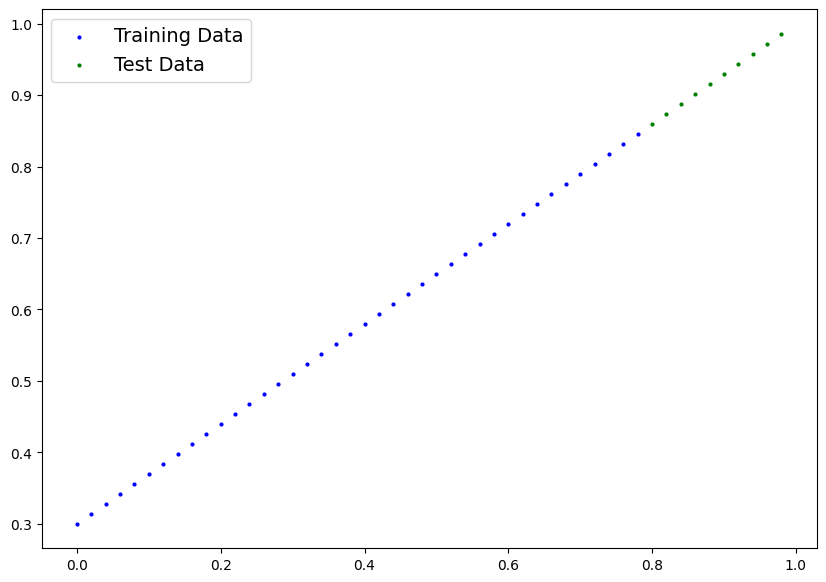

In [15]:
plot_predications()

In [16]:
#Build model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad= True, dtype = torch.float))
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias
        

In [92]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model 
model_0 = LinearRegressionModel()
model_0.named_parameters()


<generator object Module.named_parameters at 0x000001D78A816E40>

In [75]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [76]:
#Make prediction using torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

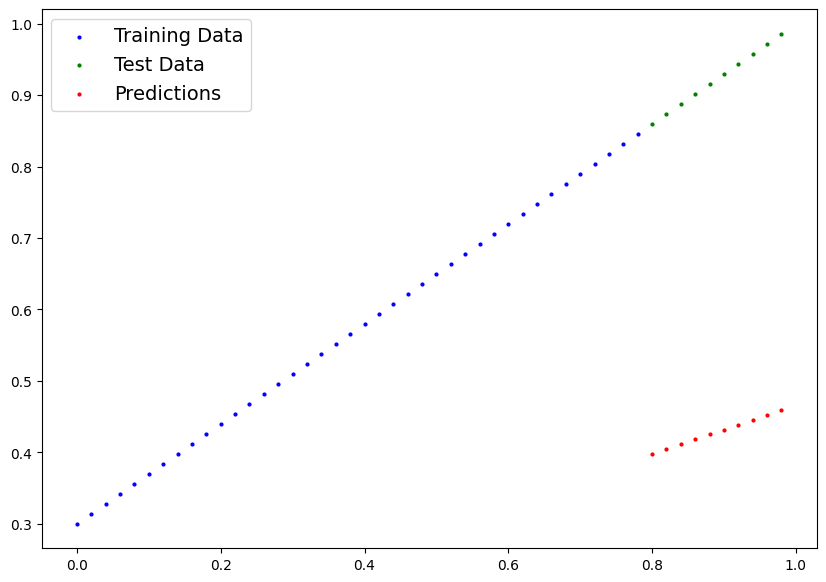

In [31]:
plot_predications(predictions=y_preds)

In [94]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [95]:
torch.manual_seed(42)
epochs = 200
epoch_count=[]
loss_values=[]
test_loss_values =[]
for epoch in range(epochs):
    #Forward propagation
    model_0.train() #tra
    y_pred = model_0(X_train)
    
    #Calculate loss
    loss = loss_fn(y_pred,y_train)
    
    #Optimizer zero grad
    optimizer.zero_grad()
    
    #Backward propagation
    loss.backward()

    #Optimizer step
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
    if epoch%10 ==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch : 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch : 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch : 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch : 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch : 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch : 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch : 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch : 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch : 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch : 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch : 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch : 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch : 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch : 130 | Loss: 0.014155393466353416 | Test loss: 0.032332

In [96]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

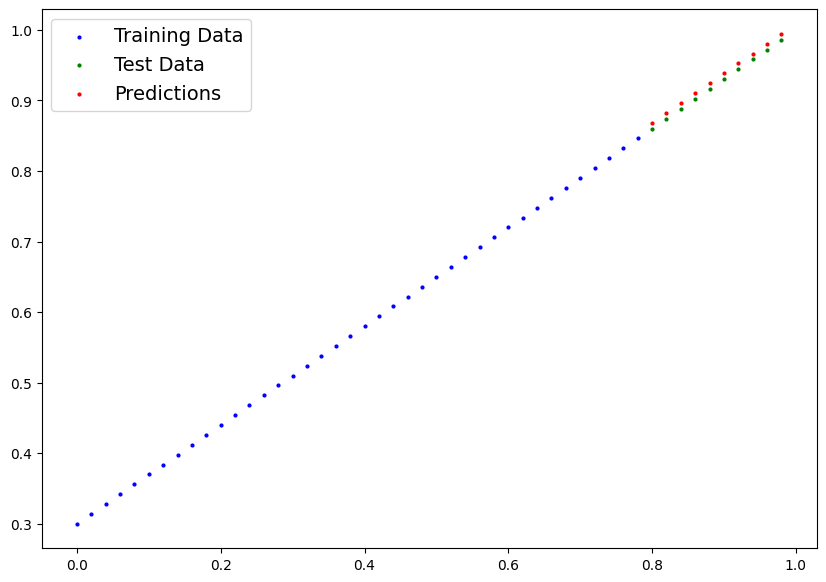

In [97]:
plot_predications(predictions=y_preds_new)

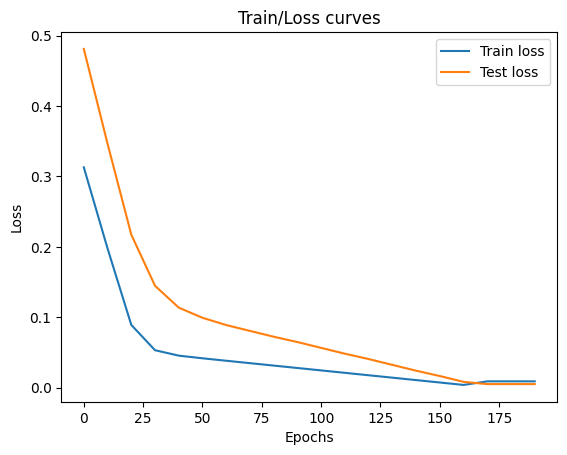

In [103]:
#Plot loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Train/Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [104]:
#Saving the model
#1) torch.save() - save pytorch object in pickel format
#2) torch.load() - load a saved pytorch object
#3) torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary

In [105]:
from pathlib import Path

#1 create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('models/01_pytorch_workflow_model_0.pth')

In [112]:
#3. save model's state_dict

torch.save(model_0.state_dict(),MODEL_SAVE_PATH)

In [113]:
#Load model from disk
loaded_model_0 = LinearRegressionModel()
#loaded_model_0.state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\dasdi\AppData\Local\Temp\ipykernel_8076\4197286104.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [114]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [115]:
with torch.inference_mode():
    loaded_y_preds = loaded_model_0(X_test)

In [119]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [120]:
y_preds == loaded_y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])